# Regression Trees & Random Forest Regression

## Libraries and settings

In [156]:
# Libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

c:\Users\Jasmin\Desktop\DA\data_analytics\Week_08


## Import the apartment data

In [157]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

# Reset index
df = df.reset_index(drop=True)

print(df.shape)
df.head(5)

(722, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


## Regression Tree
See also: https://data36.com/regression-tree-python-scikit-learn

### Create train and test samples for the regression tree (train = 80%, test = 20% of the data)

In [158]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[[ 'pop_dens',
                                                        'mean_taxable_income',
                                                        'dist_supermarket']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
        pop_dens  mean_taxable_income  dist_supermarket
456   165.018625          65380.98802       1958.318650
6     525.662252         111422.35870        282.095910
362   424.146342          72133.75058       2606.231069
594  1044.628957          70964.08794        564.607066
439   399.525129          62000.54187        646.823905 

y_train:
456    1900
6      1850
362    2090
594    2102
439    1800
Name: price, dtype: int64


### Fit the regression tree model

In [159]:
# Create decision tree regressor object
reg = DecisionTreeRegressor(random_state=20, max_depth=5)

# Train decision tree regressor
reg = reg.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = reg.predict(X_test)

### Calculate coefficient of determination (R-squared)

In [160]:
# Calculate coefficient of determination
print('R-squared:', round(r2_score(y_test, y_pred), 4))

R-squared: 0.0192


**Explanation:**
The R-squared value dropped significantly after removing the area and rooms variables. This indicates that these variables were crucial in explaining the variability of the target variable (price_per_m²). By excluding these features:

- The model loses important predictive information.
- The remaining variables (pop_dens, mean_taxable_income, and dist_supermarket) are insufficient to explain the variance in the target variable effectively, resulting in a much lower R-squared value.

### Print text representation of the regression tree

In [161]:
# Text representation of the regression tree
text_representation = tree.export_text(reg, 
                                       feature_names=list(X_train.columns))

# Print text_representation
print(text_representation)

|--- mean_taxable_income <= 79509.47
|   |--- dist_supermarket <= 864.63
|   |   |--- dist_supermarket <= 521.88
|   |   |   |--- dist_supermarket <= 515.60
|   |   |   |   |--- pop_dens <= 1357.61
|   |   |   |   |   |--- value: [2278.18]
|   |   |   |   |--- pop_dens >  1357.61
|   |   |   |   |   |--- value: [2108.95]
|   |   |   |--- dist_supermarket >  515.60
|   |   |   |   |--- value: [3440.00]
|   |   |--- dist_supermarket >  521.88
|   |   |   |--- pop_dens <= 1471.94
|   |   |   |   |--- pop_dens <= 770.16
|   |   |   |   |   |--- value: [2165.35]
|   |   |   |   |--- pop_dens >  770.16
|   |   |   |   |   |--- value: [1827.62]
|   |   |   |--- pop_dens >  1471.94
|   |   |   |   |--- mean_taxable_income <= 77949.16
|   |   |   |   |   |--- value: [2236.94]
|   |   |   |   |--- mean_taxable_income >  77949.16
|   |   |   |   |   |--- value: [2940.00]
|   |--- dist_supermarket >  864.63
|   |   |--- mean_taxable_income <= 71756.05
|   |   |   |--- mean_taxable_income <= 65012.

### Vizualizing the regression tree

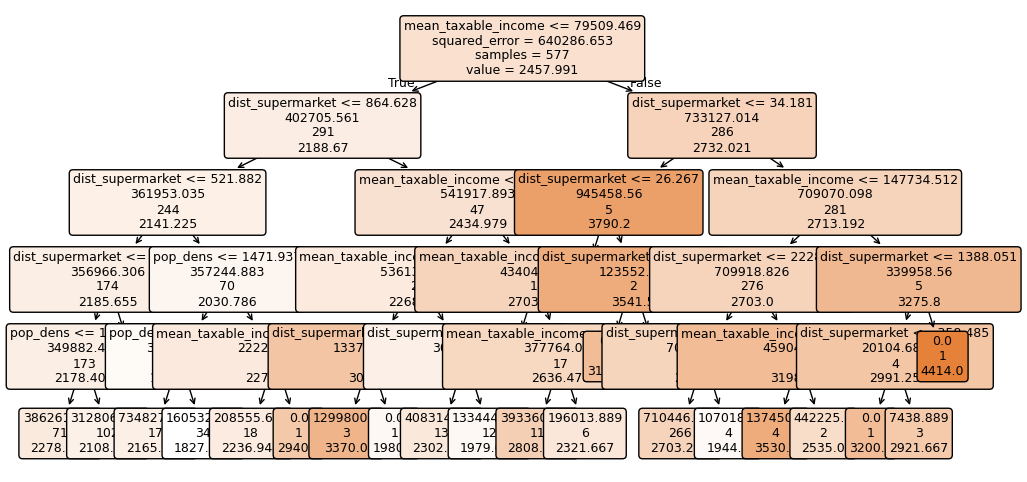

In [162]:
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(reg, 
                   feature_names=list(X_train.columns),  
                   class_names=['price'],
                   filled=True,
                   fontsize=9,
                   label='root',
                   rounded=True)


The comparison between the regression tree outputs for max_depth=3 (original) and max_depth=5 (modified) reveals the following differences:

**Before:**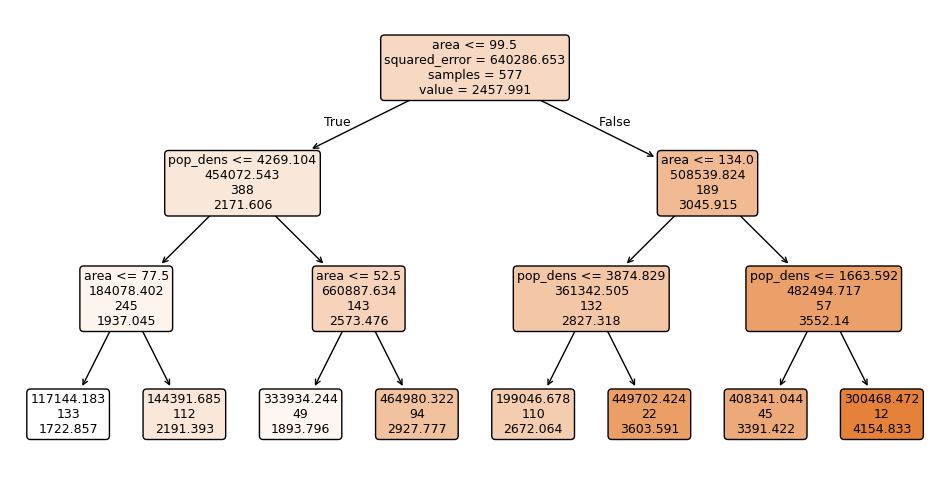

**Differences:**
1. Tree Complexity:

- max_depth=3: The tree is simpler, containing fewer splits and fewer leaf nodes.
- max_depth=5: The tree is more complex, with additional splits and more leaf nodes, allowing for more detailed predictions.

2. Interpretability:

- max_depth=3: Easier to interpret because there are fewer splits, and the structure is less granular.
- max_depth=5: More challenging to interpret due to the increased number of splits and nodes, which results in greater depth and complexity.

3. Model Fitting:

- max_depth=3: May underfit the data, as the tree does not capture finer relationships in the dataset.
- max_depth=5: Likely captures more detailed patterns but risks overfitting, where the model becomes too specific to the training data.

**Explanation**
The differences occur because increasing the max_depth parameter allows the tree to grow deeper, enabling it to split the data more times and capture more intricate patterns. While this can improve the model's accuracy on the training data, it may also lead to overfitting, where the tree performs well on training data but poorly on unseen data. Balancing max_depth is crucial for achieving optimal performance without overfitting.

## Random Forest Regression
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Create train and test samples for the random forest (train = 80%, test = 20% of the data)

In [163]:
# Create train and test samples (the names X2_ and y2_ were used because X_ and y_ were already used above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['rooms',
                                                            'pop_dens',
                                                            'mean_taxable_income',
                                                            'dist_supermarket']], 
                                                            df['price'], 
                                                            test_size=0.20, 
                                                            random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     rooms     pop_dens  mean_taxable_income  dist_supermarket
456    6.5   165.018625          65380.98802       1958.318650
6      3.5   525.662252         111422.35870        282.095910
362    3.5   424.146342          72133.75058       2606.231069
594    2.5  1044.628957          70964.08794        564.607066
439    3.5   399.525129          62000.54187        646.823905 

y2_train:
456    1900
6      1850
362    2090
594    2102
439    1800
Name: price, dtype: int64


### Fit the Random Forest Regression

In [164]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=5, shuffle=False)


reg_rf = RandomForestRegressor(n_estimators=500, 
                               max_depth=10, 
                               random_state=5)
reg_rf.fit(X2_train, y2_train)

# Calculate coefficient of determination (R-squared)
print('R-squared:', round(reg_rf.score(X2_test, y2_test), 4))

R-squared: 0.3215


### Show feature importance

Index(['rooms', 'dist_supermarket', 'mean_taxable_income', 'pop_dens'], dtype='object')
[0.39736226 0.27042968 0.17860647 0.15360159]


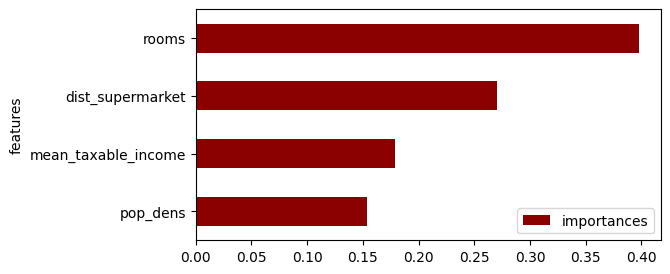

In [165]:
cols = X2_train.columns

# Derive feature importance from random forest
importances = reg_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

plt.show()

**Before:**
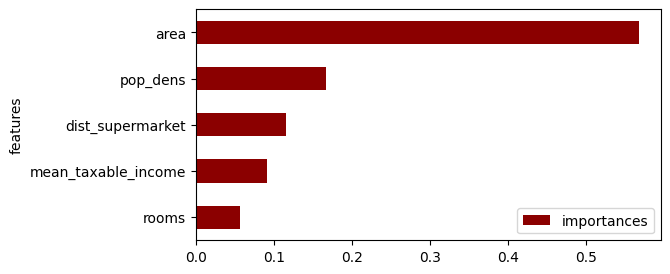



### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [166]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-12-01 12:40:25
Python Version: 3.12.0
-----------------------------------
